In [1]:

# %   COURSE: Neural signal processing and analysis: Zero to hero
# %  SESSION: Problem set: Spectral analyses of real and simulated data
# %  TEACHER: Mike X Cohen, sincxpress.com


In [24]:
import sys
sys.path.insert(1, '../')
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.io import loadmat
from numpy.fft import fft, ifft
import random
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (19, 6)  # Set the figure size to 10x8 inches
pi = np.pi

In [3]:

# %% 1) Generate 10 seconds of data at 1 kHz, comprising 4 sine waves with different 
# %    frequencies (between 1 and 30 Hz) and different amplitudes.
# %    Plot the individual sine waves, each in its own plot. In separate subplots,
# %    plot the summed sine waves with (1) a little bit of noise and (2) a lot of noise.
# % 


In [4]:
srate = 1000 # 1 kHz
n = 4
frex = random.sample(range(1,31), n)
amplit = random.sample(range(1,20), n)
phases = [x*pi for x in random.sample(range(1,9), 4)]
time = np.arange(-1, 1, 1/srate)

In [5]:
sine_waves = np.zeros((len(time), 4))
for fi in range(n):
    sine_waves[:, fi] = amplit[fi] * np.sin(2*pi*frex[fi]*time + phases[fi])

littleNoise = np.sum(sine_waves, axis=1) + np.random.randn(len(time))
lotsOfNoise = np.sum(sine_waves, axis=1) + 10* np.random.randn(len(time))

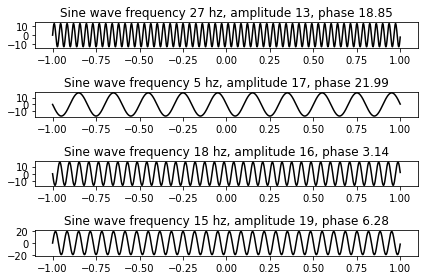

In [6]:
# % plot constituent sine waves (without noise)
fig, axs = plt.subplots(n)
for fi in range(n):
    axs[fi].plot(time, sine_waves[:, fi], 'k')
    axs[fi].set_title(f"Sine wave frequency {frex[fi]} hz, amplitude {amplit[fi]}, phase {phases[fi]:.2f}")
fig.tight_layout()  # Automatically adjust the padding between subplots
plt.show()  # Display the plot

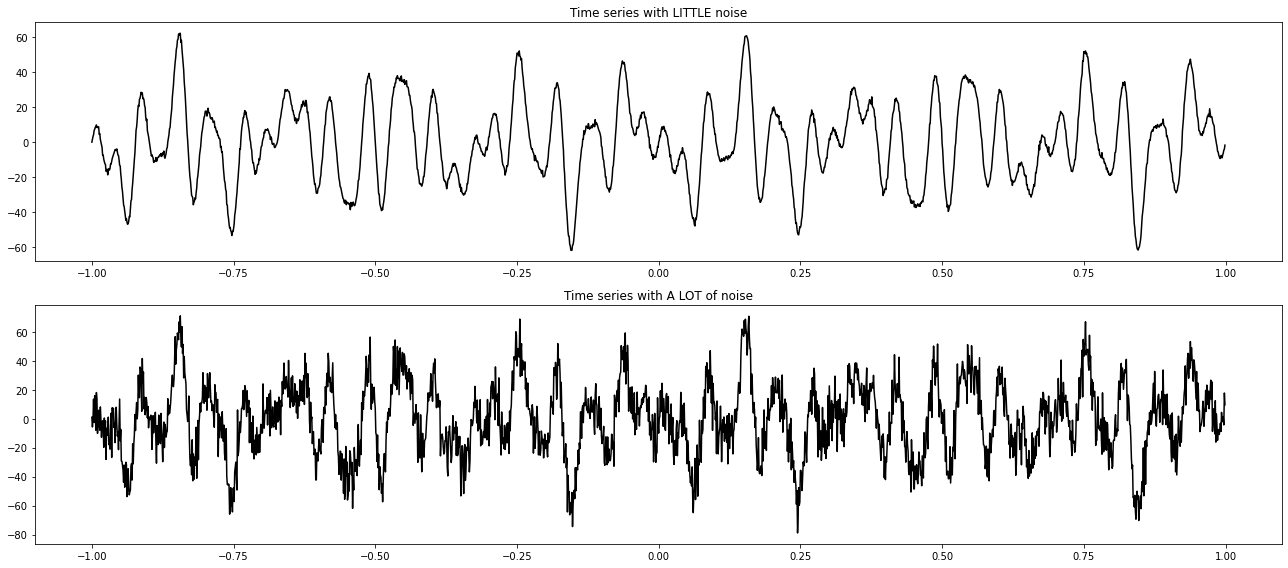

In [7]:
fig, axs = plt.subplots(2,1, figsize=(18,8))

# % plot summed sine waves with little noise
axs[0].plot(time, littleNoise, 'k')
axs[0].set_title('Time series with LITTLE noise')

axs[1].plot(time, lotsOfNoise, 'k')
axs[1].set_title('Time series with A LOT of noise')
fig.tight_layout()
plt.show()

In [8]:
# %% 2) Compute the power spectrum of the simulated time series (use FFT) and plot the results, 
# %    separately for a little noise and a lot of noise. Show frequencies 0 to 35 Hz.
# %    How well are the frequencies reconstructed, and does this depend on noise?
# % 

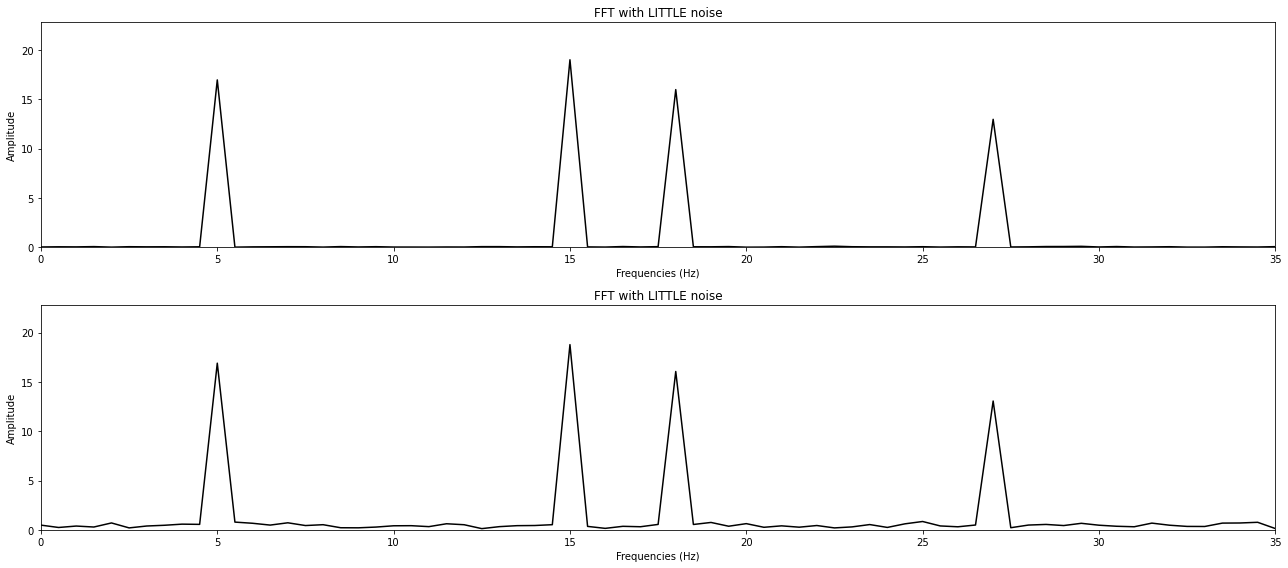

In [9]:
noises = [littleNoise, lotsOfNoise]
fig, axs = plt.subplots(2,1, figsize=(18,8))

for noisei in range(len(noises)):
    f = 2 *  abs((fft(noises[noisei]) / len(time)))
    
    # compute frequencies in Hz
    hz = np.linspace(0, srate/2, len(time)//2+1)
    ax = axs[noisei]
    # plot the amplitude spectrum
    ax.plot(hz, f[:len(hz)], 'k')
    ax.set_xlabel('Frequencies (Hz)') 
    ax.set_ylabel('Amplitude')
    ax.set_xlim([0,35])
    ax.set_ylim([0,max(amplit)*1.2])
            
    if noisei == 0:
        ax.set_title('FFT with LITTLE noise')
    else:
        ax.set_title('FFT with LITTLE noise')
fig.tight_layout()
plt.show()

In [10]:
# %% 3) Compute the power spectrum of data from electrode 7 in the laminar V1 data. 
# %    First, compute the power spectrum separately for each trial and then average the power 
# %    results together. Next, average the trials together and then compute the power spectrum. 
# %    Do the results look similar or different, and are you surprised? Why might they look 
# %    similar or different?
# % 

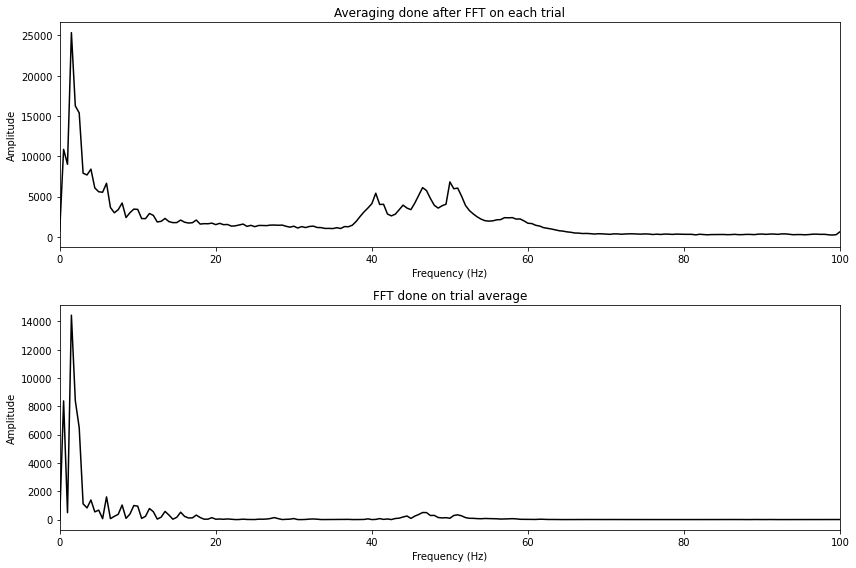

In [11]:
data = loadmat('../v1_laminar.mat')
csd = data['csd']
srate = data['srate'][0][0]
n = csd.shape[1]
timevec = np.squeeze(data['timevec'].T)
pnts = len(timevec)

# pick which channel
chan2use = 6  # 7 for matlab means 6 for python

def laminar_fft(chan2use):
    # % FFT of all trials individually (note that you can do it in one line!)
    powspectSeparate = (2* abs(fft(csd[chan2use,:,:], axis=0) / pnts)) ** 2
    # % Then average the single-trial spectra together (average over trials, not over frequencies)
    powspectSeparate = np.mean(powspectSeparate, axis=1)

    # % now average first, then take the FFT of the trial average
    powspectAverage  = np.mean(csd[chan2use, :, :], axis=1)
    powspectAverage  = (2 * abs(fft(powspectAverage) / pnts)) ** 2

    hz = np.linspace(0, srate/2, pnts//2+1)

    fig, axs = plt.subplots(2,1, figsize=(12,8))
    axs[0].plot(hz, powspectSeparate[:len(hz)], 'k')
    axs[0].set_xlim([0, 100])
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title('Averaging done after FFT on each trial')

    axs[1].plot(hz, powspectAverage[ :len(hz)], 'k')
    axs[1].set_xlim([0, 100])
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].set_title('FFT done on trial average')

    fig.tight_layout()
    plt.show()

laminar_fft(chan2use)


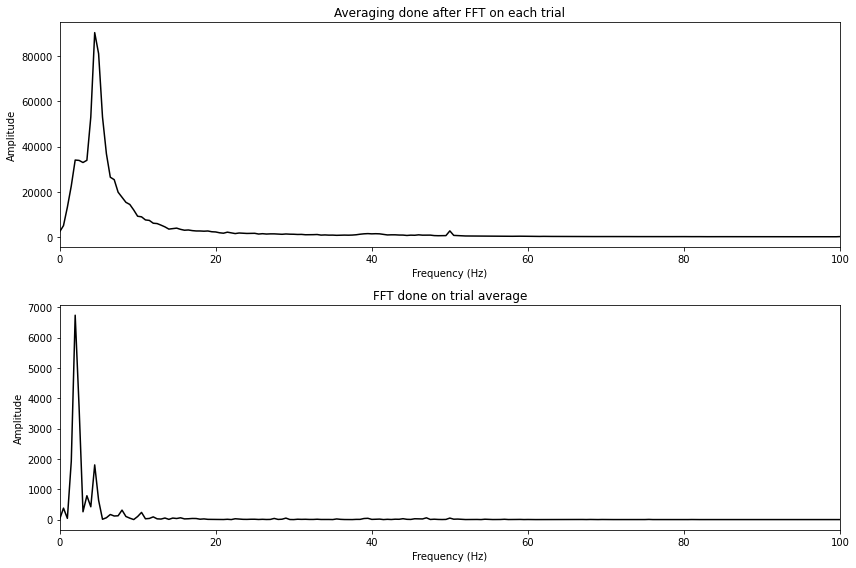

In [12]:
# %% 4) Do the same as above but for electrode 1. 
# %    How do these results compare to the results from channel 7, and does this depend on
# %    whether you average first in the time-domain or average the individual power spectra?
# % ANATOMICAL NOTE: channel 7 is around L4; channel 1 is in the hippocampus.

laminar_fft(0)

In [13]:
# %% 5) Fourier transform from scratch!
# % Hey, wouldn't it be fun to program the discrete-time Fourier transform
# % from scratch! Yes, of course it would be. Let's do that.
# % Generate a 20-element vector of random numbers.
# % Use the hints below to help you write the Fourier transform.
# % Next, use the fft function on the same data to verify that your FT was accurate.

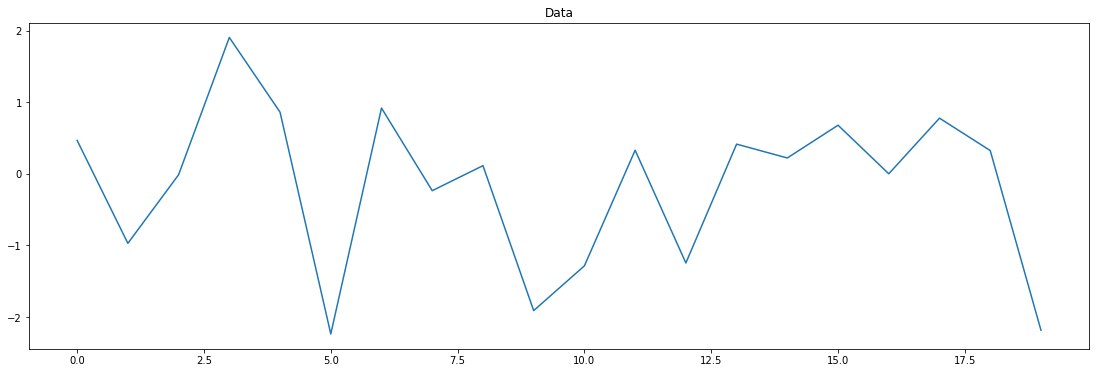

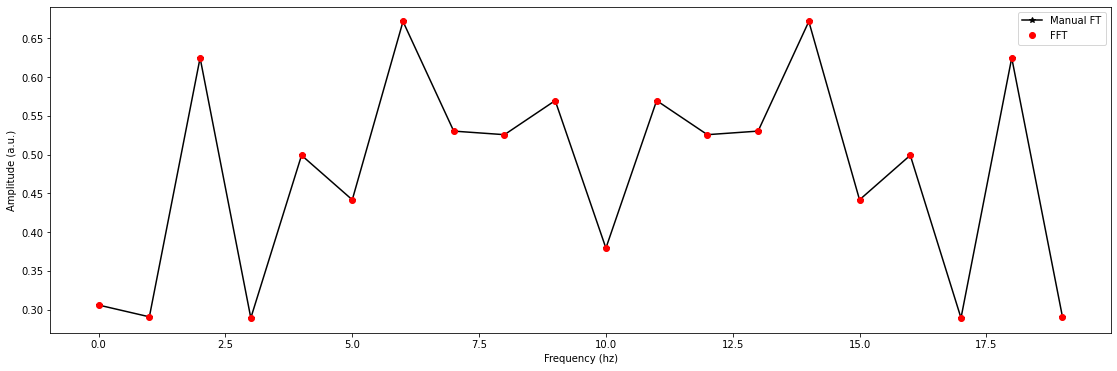

In [25]:
N = 20 # length of sequence
signal = np.random.randn(N) # data
fTime = np.arange(N)/N # "time" used in Fourier transform

# initialize Fourier output matrix
fourierCoefs = np.zeros(N, dtype=complex)

for fi in range(N):
    # create sine wave for this frequency
    fourierSine = np.exp(-1j*2*pi*fi*fTime)
    
    # compute dot product as sum of point-wise elements
    fourierCoefs[fi] = np.dot( signal, fourierSine)

fourierCoefs = fourierCoefs / N

plt.plot(signal)
plt.title('Data')
plt.show()

plt.plot(abs(fourierCoefs)*2, 'k*-', label='Manual FT')
plt.ylabel('Amplitude (a.u.)')
plt.xlabel('Frequency (hz)')

# for comparison use the fft function
fourierCoefsF = np.fft.fft(signal) / N
plt.plot(abs(fourierCoefsF)*2, 'ro', label='FFT')
plt.legend()

plt.show()

In [15]:
# %% 6) zero-padding and interpolation
# % Compute the power spectrum of channel 7 from the V1 dataset. Take the
# % power spectrum of each trial and then average the power spectra together.
# % But don't use a loop over trials! And use only the data from 0-.5 sec. 
# % What is the frequency resolution?
# % Repeat this procedure, but zero-pad the data to increase frequency
# % resolution. Try some different zero-padding numbers. At what multiple of the native nfft
# % does the increased frequency resolution have no appreciable visible effect on the results?

In [16]:
data = loadmat('../v1_laminar.mat')
csd = data['csd']
srate = data['srate'][0][0]
timevec = np.squeeze(data['timevec'].T)
timevec.shape

(1527,)

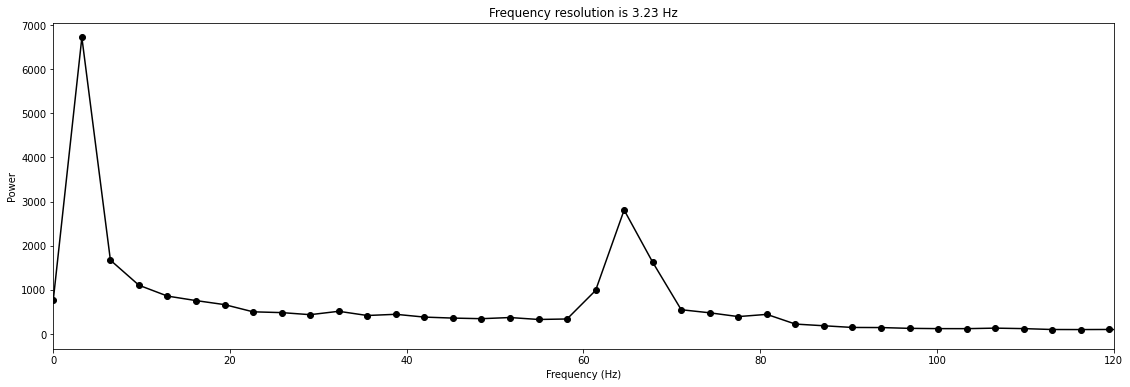

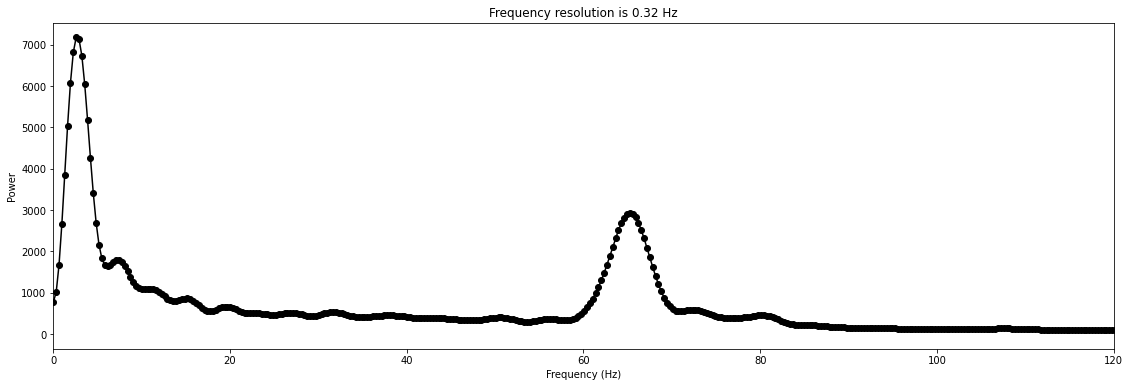

In [26]:
def time_to_id(times_arr, time2plot):
    # convert time in ms to time in indices
    return np.argmin(np.abs(times_arr - time2plot))

def laminar_zeropad_fft(mult):
    
    pnts = len(timevec)
    
    tidx = [time_to_id(timevec, 0), time_to_id(timevec, 0.5)]
    nfft = mult * (tidx[1] - tidx[0])

    data = csd[6, tidx[0]:tidx[1]+1, :]
    powspect = (abs(fft(data,n=nfft, axis=0) / pnts)*2 ) ** 2
    powspect = np.mean(powspect, axis=1)
    hz = np.linspace(0, srate/2, nfft//2+1)

    plt.plot(hz, powspect[:len(hz)], 'k-o')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.xlim([0,120])
    plt.title( f'Frequency resolution is {np.mean(np.diff(hz)):.2f} Hz')
    plt.show()
    
laminar_zeropad_fft(1)
laminar_zeropad_fft(10)

In [18]:
# %% 7) Poor man's filter via frequency-domain manipulations.
# % The goal of this exercise is to see how a basic frequency-domain filter
# %  works: Take the FFT of a signal, zero-out some Fourier coefficients,
# %  take take the IFFT. 
# % Here you will do this by generating a 1/f noise signal and adding 50 Hz
# %  line noise.

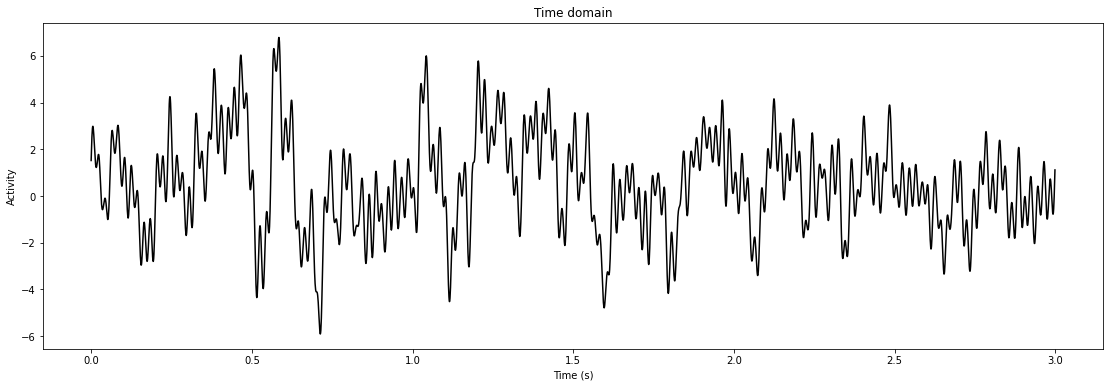

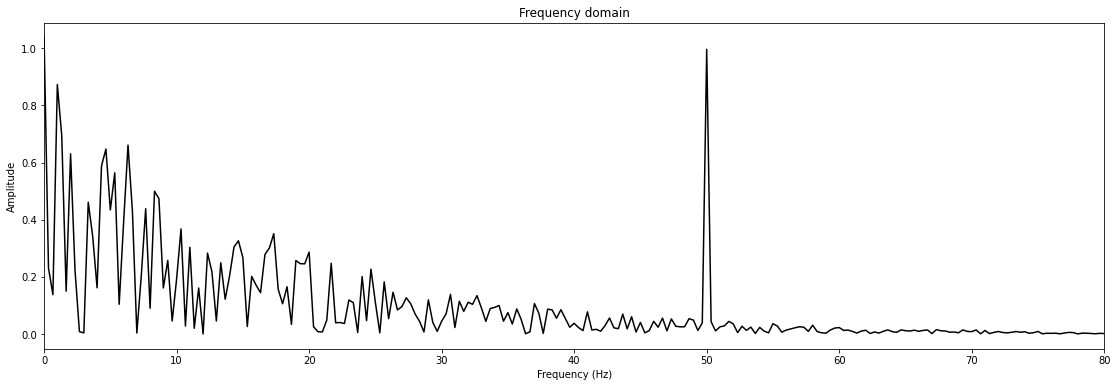

In [27]:
# % Generate 1/f noise with 50 Hz line noise. 
srate = 1234
npnts = srate*3
time  = np.arange(npnts)/srate

# % the key parameter of pink noise is the exponential decay (ed)
ed = 50 # try different values
as_ = np.random.uniform(size=(npnts)) * np.exp(-np.arange(npnts)/ed)
fc = as_ * np.exp(1j * 2 * pi * np.random.uniform(size=(as_.shape)))

signal = ifft(fc).real * npnts

# now add 50 Hz line noise
signal = signal + np.sin(2* pi * 50 * time)

# compute its spectrum
hz = np.linspace(0, srate/2, npnts//2+1)
signalX = fft(signal)

# %%% plot the signal and its power spectrum
plt.plot(time,signal,'k')
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.title('Time domain')
plt.show()

plt.plot(hz,2*abs(signalX[:len(hz)])/npnts,'k')
plt.xlim([0, 80])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

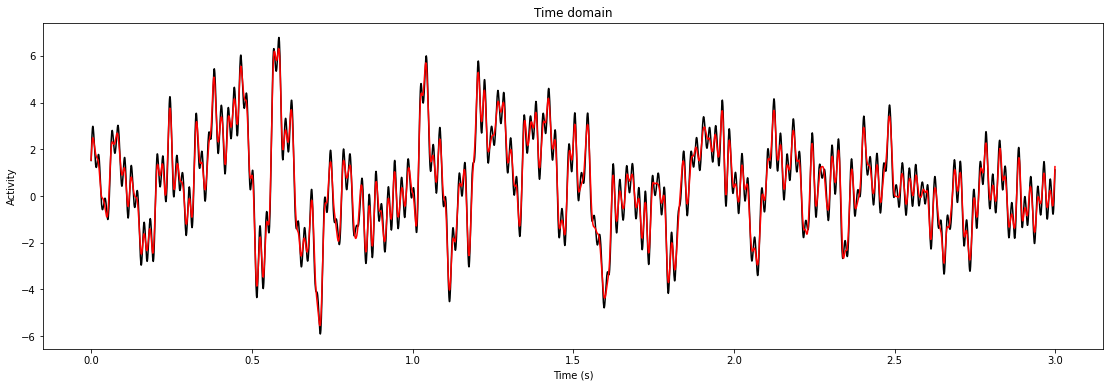

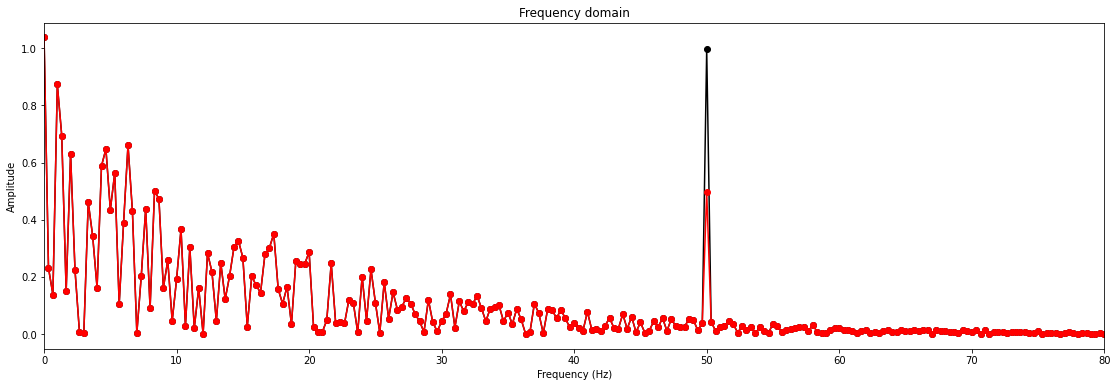

In [28]:
# %% zero-out the 50 Hz component

# % find the index into the frequencies vector at 50 hz
hz50idx = np.argmin(np.abs(hz - 50))

# % create a copy of the frequency vector
signalXf = signalX.copy() # f=filter

# % zero out the 50 Hz component
signalXf[hz50idx] = 0;

# % take the IFFT
signalf = ifft(signalXf).real

# % take FFT of filtered signal
signalXf = fft(signalf)

plt.plot(time,signal,'k')
plt.plot(time,signalf,'r')
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.title('Time domain')
plt.show()

plt.plot(hz,2*abs(signalX[:len(hz)])/npnts,'ko-')
plt.plot(hz,2*abs(signalXf[:len(hz)])/npnts,'ro-', markerfacecolor='r')
plt.xlim([0, 80])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

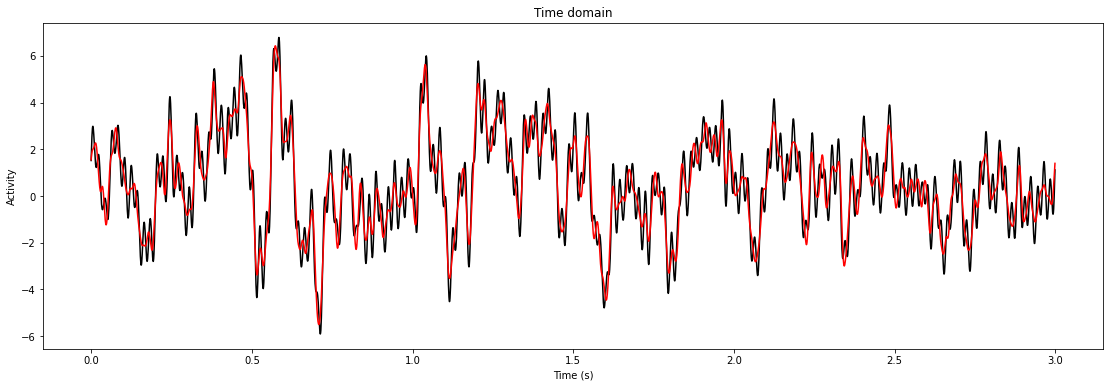

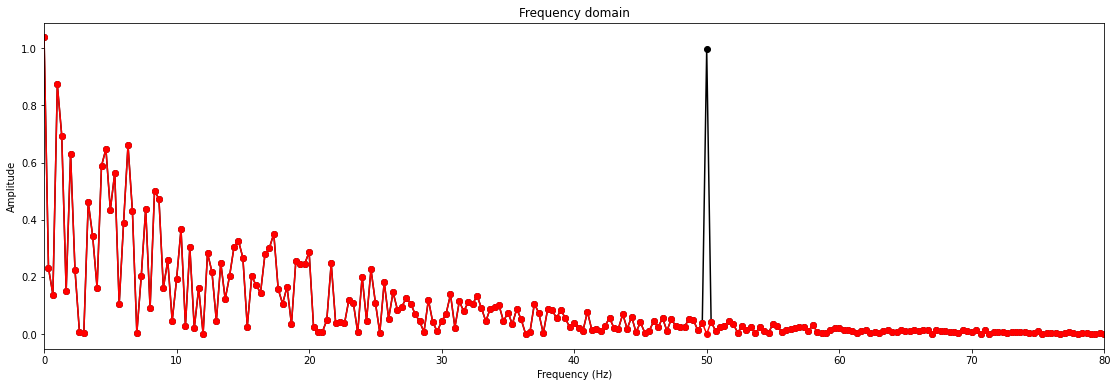

In [30]:
# %% now fix the problem ;)

# % Notice that the filter didn't work: It attenuated but did not eliminate
# % the line noise. Why did this happen? Use plotting to confirm your
# % hypothesis! Then fix the problem in this cell ;)

# % create a copy of the frequency vector
signalXf = signalX.copy() # f=filter

# % zero out the 50 Hz component
signalXf[hz50idx] = 0
signalXf[-hz50idx] = 0

# % take the IFFT
signalff = ifft(signalXf).real

# % take FFT of filtered signal
signalXf = fft(signalff)

plt.plot(time,signal,'k')
plt.plot(time,signalff,'r')
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.title('Time domain')
plt.show()

plt.plot(hz,2*abs(signalX[:len(hz)])/npnts,'ko-')
plt.plot(hz,2*abs(signalXf[:len(hz)])/npnts,'ro-', markerfacecolor='r')
plt.xlim([0, 80])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

In [22]:
# %% 8) Exploring why the filter in #7 isn't a good filter


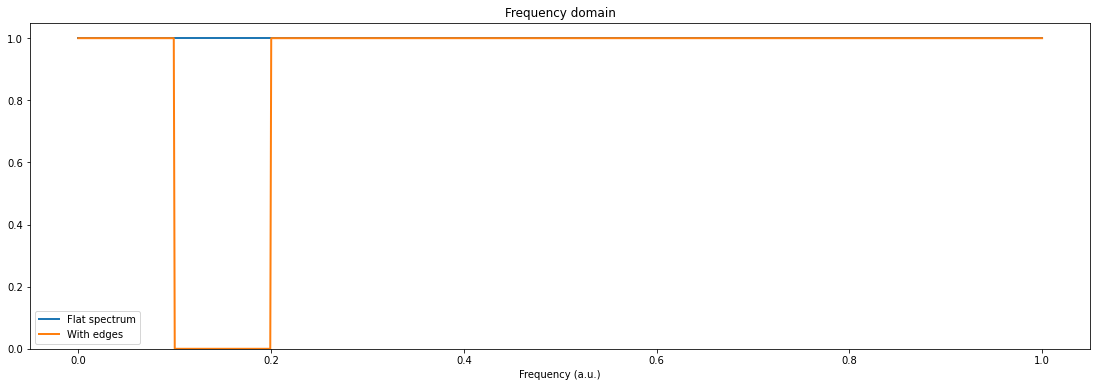

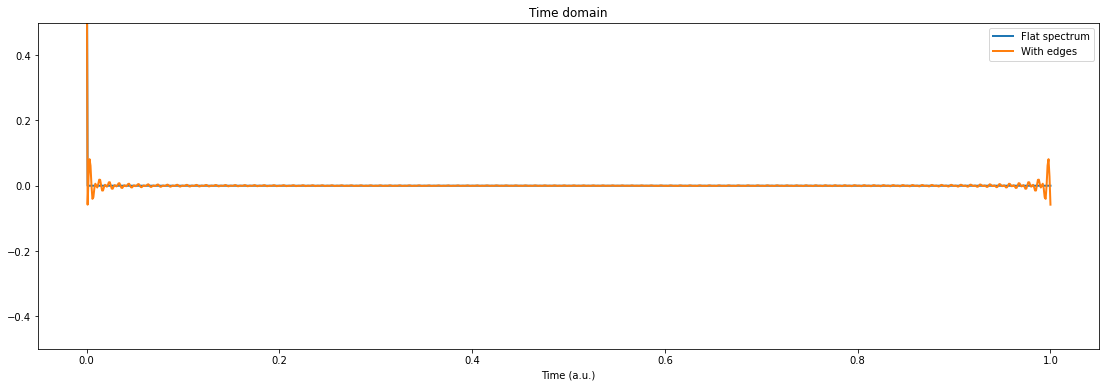

In [31]:
N = 1000
fourspect1 = np.ones(N)

fourspect2 = fourspect1.copy()
fourspect2[round(N*0.1) : round(N*0.2)] = 0


signal1 = ifft(fourspect1).real
signal2 = ifft(fourspect2).real
time = np.linspace(0,1,N)

plt.plot(time,fourspect1,linewidth=2, label='Flat spectrum')
plt.plot(time,fourspect2,linewidth=2, label= 'With edges')
plt.ylim([0 ,1.05])
plt.xlabel('Frequency (a.u.)')
plt.title('Frequency domain')
plt.legend()
plt.show()


plt.plot(time,signal1,linewidth=2, label='Flat spectrum')
plt.plot(time,signal2,linewidth=2, label= 'With edges')
plt.ylim([-1*0.5 ,1*0.5])
plt.xlabel('Time (a.u.)')
plt.title('Time domain')
plt.legend()
plt.show()